<a href="https://colab.research.google.com/github/KaggleStudy4th/4th_kaggle_study/blob/main/%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C/22%EC%A3%BC%EC%B0%A8/DNN%2CCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mnist_softmax_SGD.

In [ ]:
import torch
import torchvision.datasets as data
import torchvision.transforms as transforms
import random

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [ ]:
#저장경로 학습/테스트 데이터 선택 : true 학습 데이터 transform:download:

mnist_train=data.MNIST(root='MNIST_data/',
                       train=True,
                       transform=transforms.ToTensor(),
                       download=True)

mnist_test=data.MNIST(root='MNIST_data/',
                      train=False,
                      transform=transforms.ToTensor(),
                      download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
data_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        drop_last=True)

In [ ]:
linear=torch.nn.Linear(784,10,bias=True)

In [ ]:
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-0.1953, -0.4404,  0.0139,  ...,  0.7510,  1.5190,  0.9637],
        [ 0.4146, -1.0660, -0.9969,  ..., -0.3259, -0.2695, -1.3316],
        [ 0.2600, -1.1821,  0.0065,  ...,  1.0648, -1.2251,  0.9841],
        ...,
        [ 0.0279, -1.7242, -1.1723,  ...,  1.3651, -0.0689, -0.7931],
        [ 0.0952,  0.1939,  0.1636,  ..., -1.0489,  0.6224, -1.7181],
        [ 2.6504,  0.6297, -1.6571,  ..., -0.0781, -1.1398, -0.8711]],
       requires_grad=True)

In [ ]:
model = torch.nn.Sequential(linear).to(device) # 'cuda'

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
total_batch=len(data_loader)

for epoch in range(training_epochs):
  avg_cost=0

  for X,Y in data_loader:
    #(1000,1,28,28) 크기의 텐서를 (1000,784) 크기의 텐서로 변형
    X=X.view(-1,28*28).to(device)
    #one-hot encoding되어있지 않음
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis=model(X)
    cost=loss(hypothesis,Y)
    cost.backward()
    optimizer.step()
 
    #평균 Error 계산
    avg_cost+=cost/total_batch

  print('Epoch:','%04d' %(epoch+1),'cost =','{:.9f}'.format(avg_cost))


Epoch: 0001 cost = 14.412130356
Epoch: 0002 cost = 12.303293228
Epoch: 0003 cost = 10.895567894
Epoch: 0004 cost = 9.731601715
Epoch: 0005 cost = 8.741955757
Epoch: 0006 cost = 7.915795326
Epoch: 0007 cost = 7.235562325
Epoch: 0008 cost = 6.667675495
Epoch: 0009 cost = 6.180422306
Epoch: 0010 cost = 5.753479004
Epoch: 0011 cost = 5.375113487
Epoch: 0012 cost = 5.038181305
Epoch: 0013 cost = 4.737372398
Epoch: 0014 cost = 4.468423843
Epoch: 0015 cost = 4.227678776


In [ ]:
#test the model using test sets

with torch.no_grad():
  X_test=mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test=mnist_test.test_labels.to(device)

  prediction=model(X_test)
  correct_prediction=torch.argmax(prediction,1)==Y_test
  accuracy=correct_prediction.float().mean()
  print('accuracy:',accuracy.item())

accuracy: 0.42160001397132874


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
#랜덤테스트
r=random.randint(0,len(mnist_test)-1)
X_single_data=mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
Y_single_data=mnist_test.test_labels[r:r+1].to(device)

print('Label:',Y_single_data.item())
single_prediction=model(X_single_data)
print('prediction: ',torch.argmax(single_prediction,1).item())

Label: 8
prediction:  7


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([8])


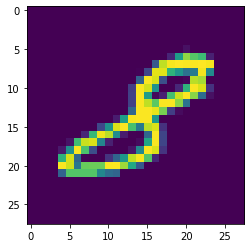

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)

# mnist_softmax_Adam

In [ ]:
linear=torch.nn.Linear(784,10,bias=True)
#bias는 false로 설정되어있으면 layer는 bias를 학습하지 않는다. 기본값은 true임. 

In [ ]:
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[ 0.1634, -0.3352,  0.0314,  ...,  1.1919, -0.4502,  0.3965],
        [-1.0368, -0.1780, -0.5245,  ..., -0.9530,  0.5088, -0.6242],
        [ 0.1055, -0.1815,  0.2085,  ...,  2.0076, -0.8664, -0.5713],
        ...,
        [-2.0019,  0.9543,  0.9286,  ...,  0.3023,  1.3302,  0.5574],
        [-0.5494, -1.1774,  1.5653,  ..., -1.0313, -0.5681, -2.2044],
        [-0.8974, -0.0055,  0.3807,  ..., -0.8308,  1.1178,  2.1534]],
       requires_grad=True)

In [ ]:
model=torch.nn.Sequential(linear).to(device)

In [ ]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
total_batch=len(data_loader)

for epoch in range(training_epochs):
  avg_cost=0

  for X,Y in data_loader:
    X=X.view(-1,28*28).to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis=model(X)
    cost=loss(hypothesis,Y)
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch

  print('Epoch: ','%04d' %(epoch+1),'cost=','{:.9f}'.format(avg_cost))


Epoch:  0001 cost= 5.614291191
Epoch:  0002 cost= 1.682482839
Epoch:  0003 cost= 1.108348846
Epoch:  0004 cost= 0.871366560
Epoch:  0005 cost= 0.738542557
Epoch:  0006 cost= 0.652831018
Epoch:  0007 cost= 0.593087435
Epoch:  0008 cost= 0.548593819
Epoch:  0009 cost= 0.514018297
Epoch:  0010 cost= 0.486797869
Epoch:  0011 cost= 0.463550925
Epoch:  0012 cost= 0.444490016
Epoch:  0013 cost= 0.428525835
Epoch:  0014 cost= 0.413917542
Epoch:  0015 cost= 0.401334196


In [ ]:
with torch.no_grad():
  X_test=mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test=mnist_test.test_labels.to(device)

  prediction=model(X_test)
  correct_prediction=torch.argmax(prediction,1)==Y_test
  accuracy=correct_prediction.float().mean()
  print('accuracy: ',accuracy.item())

accuracy:  0.8924000263214111


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
# 랜덤 테스트
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

Label:  5
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([5])


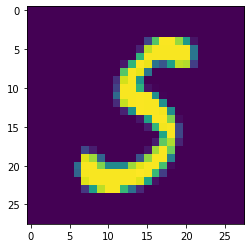

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)

#NN

In [ ]:
data_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        drop_last=True)

In [ ]:
linear1=torch.nn.Linear(784,256,bias=True)
linear2=torch.nn.Linear(256,256,bias=True)
linear3=torch.nn.Linear(256,10,bias=True)
relu=torch.nn.ReLU()

In [ ]:
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[ 0.1433, -0.5848, -1.2871,  ...,  0.1365, -0.6771, -1.2218],
        [ 0.3133, -0.6922, -0.4266,  ..., -1.0904, -0.5532, -0.5666],
        [ 0.4819, -0.8147,  0.7415,  ...,  0.8396, -0.1836,  2.0754],
        ...,
        [ 0.2445, -0.8987, -1.7621,  ...,  2.0461, -1.1659, -0.5037],
        [ 0.6488,  0.0395,  0.5761,  ..., -0.7756, -0.2757, -1.3476],
        [ 0.5010, -0.0942,  0.2242,  ...,  1.2468, -0.5346,  0.2344]],
       requires_grad=True)

In [ ]:
model=torch.nn.Sequential(linear1,relu,linear2,relu,linear3).to(device)

In [ ]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:

        # (1000, 1, 28, 28) 크기의 텐서를 (1000, 784) 크기의 텐서로 변형
        X = X.view(-1, 28 * 28).to(device)
        # one-hot encoding되어 있지 않음
        Y = Y.to(device)
        #%debug

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X)
        # Error 계산
        cost = loss(hypothesis, Y)
        # Backparopagation
        cost.backward()
        # 가중치 갱신
        optimizer.step()

        # 평균 Error 계산
        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 151.744277954
Epoch: 0002 cost = 38.019424438
Epoch: 0003 cost = 23.869844437
Epoch: 0004 cost = 16.533475876
Epoch: 0005 cost = 12.029699326
Epoch: 0006 cost = 8.957776070
Epoch: 0007 cost = 6.778704643
Epoch: 0008 cost = 4.962552547
Epoch: 0009 cost = 3.764966249
Epoch: 0010 cost = 2.778804064
Epoch: 0011 cost = 2.029551744
Epoch: 0012 cost = 1.625326633
Epoch: 0013 cost = 1.240280271
Epoch: 0014 cost = 1.016408563
Epoch: 0015 cost = 0.787618697
Learning finished


In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9491999745368958


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
# 랜덤 테스트
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

Label:  7
Prediction:  7


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([7])


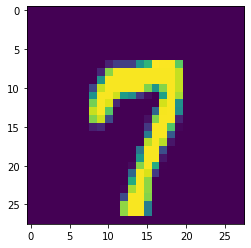

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)

# nn_xavier

In [ ]:
linear1 = torch.nn.Linear(784,256,bias=True)
linear2 = torch.nn.Linear(256,256,bias=True)
linear3 = torch.nn.Linear(256,10,bias=True)
relu = torch.nn.ReLU()

In [ ]:
# Random Init => Xavier Init
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[ 0.1063, -0.0732,  0.1492,  ...,  0.0276,  0.1120,  0.0946],
        [-0.1453,  0.1473,  0.0408,  ...,  0.1216,  0.0676,  0.0574],
        [-0.0819, -0.0709, -0.1136,  ...,  0.0053,  0.0530, -0.1025],
        ...,
        [-0.0561,  0.0672,  0.0926,  ...,  0.1199, -0.1094,  0.1500],
        [ 0.1065, -0.0737,  0.0638,  ..., -0.0610,  0.1423,  0.1127],
        [-0.0392, -0.1086, -0.0833,  ..., -0.0604,  0.1369, -0.0792]],
       requires_grad=True)

In [ ]:
model=torch.nn.Sequential(linear1,relu,linear2,relu,linear3).to(device)

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:

        # (1000, 1, 28, 28) 크기의 텐서를 (1000, 784) 크기의 텐서로 변형
        X = X.view(-1, 28 * 28).to(device)
        # one-hot encoding되어 있지 않음
        Y = Y.to(device)
        #%debug

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X)
        # Error 계산
        cost = loss(hypothesis, Y)
        # Backparopagation
        cost.backward()
        # 가중치 갱신
        optimizer.step()

        # 평균 Error 계산
        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.239859194
Epoch: 0002 cost = 0.091976449
Epoch: 0003 cost = 0.060934443
Epoch: 0004 cost = 0.045493159
Epoch: 0005 cost = 0.034469225
Epoch: 0006 cost = 0.027829496
Epoch: 0007 cost = 0.020512762
Epoch: 0008 cost = 0.018400710
Epoch: 0009 cost = 0.015128742
Epoch: 0010 cost = 0.014211728
Epoch: 0011 cost = 0.013758255
Epoch: 0012 cost = 0.011961517
Epoch: 0013 cost = 0.012534533
Epoch: 0014 cost = 0.010166365
Epoch: 0015 cost = 0.005991415
Learning finished


In [ ]:
with torch.no_grad():
  X_test=mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test=mnist_test.test_labels.to(device)

  prediction=model(X_test)
  correct_prediction=torch.argmax(prediction,1)==Y_test
  accuracy=correct_prediction.float().mean()
  print('Accuracy :',accuracy.item())

Accuracy : 0.9793000221252441


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

Label:  9
Prediction:  9


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([9])


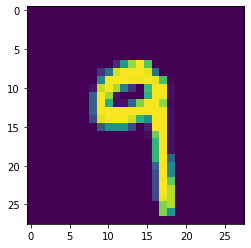

In [ ]:
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)

# DNN_xavier

In [ ]:
linear1=torch.nn.Linear(784,512,bias=True)
linear2=torch.nn.Linear(512,512,bias=True)
linear3=torch.nn.Linear(512,512,bias=True)
linear4=torch.nn.Linear(512,512,bias=True)
linear5=torch.nn.Linear(512,10,bias=True)
relu=torch.nn.ReLU()

In [ ]:
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[-0.0443,  0.0701,  0.0214,  ...,  0.0111,  0.0200,  0.0612],
        [-0.0552, -0.0209,  0.0327,  ...,  0.0281, -0.0208,  0.0007],
        [-0.0075,  0.0184,  0.0340,  ...,  0.0308,  0.0581, -0.0895],
        ...,
        [-0.0821, -0.1007,  0.0710,  ..., -0.0753, -0.0535,  0.0151],
        [ 0.0203,  0.0918, -0.0716,  ...,  0.0831,  0.0444, -0.0927],
        [ 0.0624,  0.0644,  0.0963,  ...,  0.0061,  0.1014,  0.0586]],
       requires_grad=True)

In [ ]:
model=torch.nn.Sequential(
    linear1,
    relu,
    linear2,
    relu,
    linear3,
    relu,
    linear4,
    relu,
    linear5
)

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=512, bias=True)
  (7): ReLU()
  (8): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:

total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:

        # (1000, 1, 28, 28) 크기의 텐서를 (1000, 784) 크기의 텐서로 변형
        X = X.view(-1, 28 * 28).to(device)
        # one-hot encoding되어 있지 않음
        Y = Y.to(device)
        #%debug

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X)
        # Error 계산
        cost = loss(hypothesis, Y)
        # Backparopagation
        cost.backward()
        # 가중치 갱신
        optimizer.step()

        # 평균 Error 계산
        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.214061603
Epoch: 0002 cost = 0.090455644
Epoch: 0003 cost = 0.064092956
Epoch: 0004 cost = 0.049463991
Epoch: 0005 cost = 0.040844675
Epoch: 0006 cost = 0.033936854
Epoch: 0007 cost = 0.030124709
Epoch: 0008 cost = 0.026166433
Epoch: 0009 cost = 0.024104083
Epoch: 0010 cost = 0.020828515
Epoch: 0011 cost = 0.020715179
Epoch: 0012 cost = 0.017590310
Epoch: 0013 cost = 0.019117691
Epoch: 0014 cost = 0.012436524
Epoch: 0015 cost = 0.016571820
Learning finished


In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9786999821662903


In [ ]:
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

Label:  3
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([3])


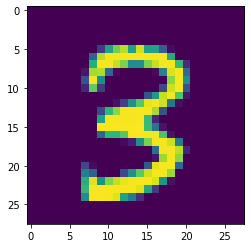

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)

# DNN_xavier_dropout

In [ ]:
learning_rate=0.001
training_epochs=15
batch_size=100
drop_prob=0.3

In [ ]:
linear1=torch.nn.Linear(784,512,bias=True)
linear2=torch.nn.Linear(512,512,bias=True)
linear3=torch.nn.Linear(512,512,bias=True)
linear4=torch.nn.Linear(512,512,bias=True)
linear5=torch.nn.Linear(512,10,bias=True)
relu=torch.nn.ReLU()
dropout=torch.nn.Dropout(p=drop_prob)

In [ ]:
# Random Init => Xavier Init
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[-0.0844,  0.0975,  0.0863,  ...,  0.0765,  0.0722, -0.0280],
        [-0.0962, -0.0771,  0.1062,  ...,  0.0040,  0.0115,  0.0902],
        [-0.0320,  0.0188, -0.0571,  ...,  0.0423,  0.0498,  0.0024],
        ...,
        [-0.0272,  0.0951, -0.0677,  ...,  0.0477, -0.0730,  0.0834],
        [-0.0895,  0.0089, -0.0985,  ..., -0.0918,  0.0964, -0.0709],
        [ 0.0985, -0.0460, -0.0130,  ...,  0.0633, -0.1067, -0.0223]],
       requires_grad=True)

In [ ]:
model=torch.nn.Sequential(linear1,relu,dropout,
                          linear2,relu,dropout,
                          linear3,relu,dropout,
                          linear4,relu,dropout,
                          linear5).to(device)

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=512, out_features=512, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.3, inplace=False)
  (9): Linear(in_features=512, out_features=512, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.3, inplace=False)
  (12): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
total_batch = len(data_loader)

model.train() 
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:

        # (1000, 1, 28, 28) 크기의 텐서를 (1000, 784) 크기의 텐서로 변형
        X = X.view(-1, 28 * 28).to(device)
        # one-hot encoding되어 있지 않음
        Y = Y.to(device)
        #%debug

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X)
        # Error 계산
        cost = loss(hypothesis, Y)
        # Backparopagation
        cost.backward()
        # 가중치 갱신
        optimizer.step()

        # 평균 Error 계산
        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.305547923
Epoch: 0002 cost = 0.147066548
Epoch: 0003 cost = 0.111166954
Epoch: 0004 cost = 0.094251446
Epoch: 0005 cost = 0.082160942
Epoch: 0006 cost = 0.076161042
Epoch: 0007 cost = 0.070585564
Epoch: 0008 cost = 0.059836168
Epoch: 0009 cost = 0.059161976
Epoch: 0010 cost = 0.056331452
Epoch: 0011 cost = 0.052290827
Epoch: 0012 cost = 0.046545047
Epoch: 0013 cost = 0.044369224
Epoch: 0014 cost = 0.047213692
Epoch: 0015 cost = 0.043976143
Learning finished


In [ ]:
# Test the model using test sets
with torch.no_grad():
    model.eval()  # 주의사항 (dropout=False)
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9790999889373779


In [ ]:
r=random.randint(0,len(mnist_test)-1)
X_single_data=mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
y_single_data=mnist_test.test_labels[r:r+1].to(device)

print('Label: ',y_single_data.item())
single_prediction=model(X_single_data)
print('prediction: ',torch.argmax(single_prediction,1).item())

Label:  2
prediction:  2


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


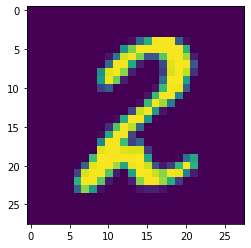

In [ ]:
plt.imshow(X_single_data.reshape(28,28).cpu())


In [ ]:
print(y_single_data)

tensor([2])


# Mnist CNN

GPU

In [ ]:
# 현재 나에게 할당된 GPU 확인하기
! nvidia-smi

Tue Aug  9 10:24:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
torch.manual_seed(777)
 
if device=='cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
learning_rate=0.001
epochs=15
batch_size=100

In [ ]:
mnist_train=dsets.MNIST(root='MNIST_data/',
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)

mnist_test=dsets.MNIST(root='MNIST_data/',
                       train=False,
                       transform=transforms.ToTensor(),
                       download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
data_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                       batch_size=batch_size,
                                       shuffle=True,
                                       drop_last=True)

In [ ]:
class CNN1(torch.nn.Module):
  def __init__(self):
    super(CNN1,self).__init__()
    #Image shape =(?,28,28,1)
    #conv=(?,28,28,32)
    #pooling=(?,14,14,32)
    self.conv1=torch.nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1)
    self.relu1=torch.nn.ReLU()
    self.maxpool1=torch.nn.MaxPool2d(kernel_size=2,stride=2)

    #Image shape =(?,14,14,32)
    #conv=(?,14,14,64)
    #pooling=(?,7,7,64)
    self.conv2=torch.nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1)
    self.relu2=torch.nn.ReLU()
    self.maxpool2=torch.nn.MaxPool2d(kernel_size=2,stride=2)

    self.fc=torch.nn.Linear(7*7*64,10,bias=True)
    torch.nn.init.xavier_uniform(self.fc.weight)#가중치 초기화
  def forward(self,x):
    out=self.conv1(x)
    out=self.relu1(out)
    out=self.maxpool1(out)
    out=self.conv2(out)
    out=self.relu2(out)
    out=self.maxpool2(out)
    out=out.view(out.size(0),-1)
    out=self.fc(out)
    return out


In [ ]:
class CNN2(torch.nn.Module):
  def __init__(self):
    super(CNN2,self).__init__()
    
    self.layer1=torch.nn.Sequential(
        torch.nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.layer2=torch.nn.Sequential(
        torch.nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.fc=torch.nn.Linear(7*7*64,10,bias=True)

    torch.nn.init.xavier_uniform_(self.fc.weight)


  def forward(self,x):
    out=self.layer1(x)
    out=self.layer2(out)
    out=out.view(out.size(0),-1)
    out=self.fc(out)
    return out


In [ ]:
model=CNN1().to(device)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  


In [ ]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
total_batch=len(data_loader)

for epoch in range(epochs):
  avg_cost=0

  for X,Y in data_loader:
    X=X.to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis=model(X)
    cost=loss(hypothesis,Y)
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch

  print('[Epoch:{:>4} cost={:>.9}'.format(epoch+1,avg_cost))


[Epoch:   1 cost=0.224681914
[Epoch:   2 cost=0.0620509535
[Epoch:   3 cost=0.0466690809
[Epoch:   4 cost=0.0371730179
[Epoch:   5 cost=0.0315141268
[Epoch:   6 cost=0.0268506892
[Epoch:   7 cost=0.0225162245
[Epoch:   8 cost=0.0195808038
[Epoch:   9 cost=0.016671421
[Epoch:  10 cost=0.0142287714
[Epoch:  11 cost=0.0121663967
[Epoch:  12 cost=0.0100708632
[Epoch:  13 cost=0.00862705894
[Epoch:  14 cost=0.00721194455
[Epoch:  15 cost=0.00668949308


In [ ]:
with torch.no_grad():
  X_test=mnist_test.test_data.view(len(mnist_test),1,28,28).float().to(device)
  Y_test=mnist_test.test_labels.to(device)

  prediction=model(X_test)
  correct_prediction=torch.argmax(prediction,1)==Y_test
  accuracy=correct_prediction.float().mean()
  print('Accuracy:',accuracy.item())

Accuracy: 0.9854999780654907


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# AI MNIST CNN LeNet5

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device=='cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
learning_rate=0.9
training_epochs=50
batch_size=256

In [ ]:

transforms=transforms.Compose([transforms.Resize((32,32)),
                               transforms.ToTensor()])
mnist_train=dsets.MNIST(root='MNIST_data/',
                        train=True,
                        transform=transforms,
                        download=True)
mnist_test=dsets.MNIST(root='MNIST_data/',
                       train=False,
                       transform=transforms,
                       download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
#dataloader

train_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

test_loader=torch.utils.data.DataLoader(dataset=mnist_test,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        drop_last=True)

In [ ]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5,self).__init__()

    self.layer1=torch.nn.Sequential(
        torch.nn.Conv2d(1,6,kernel_size=5,stride=1,padding=0),
        torch.nn.Sigmoid(),
        torch.nn.AvgPool2d(kernel_size=2,stride=2)

    )
    self.layer2=torch.nn.Sequential(
        torch.nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0),
        torch.nn.Sigmoid(),
        torch.nn.AvgPool2d(kernel_size=2,stride=2)
    )
    self.layer3=torch.nn.Sequential(
        torch.nn.Linear(16*5*5,120,bias=True),
        torch.nn.Sigmoid()
    )
    self.layer4=torch.nn.Sequential(
        torch.nn.Linear(120,84,bias=True),
        torch.nn.Sigmoid()
    )
    self.layer5=torch.nn.Linear(84,10,bias=True)


  def forward(self,x):
    out=self.layer1(x)
    out=self.layer2(out)
    out=out.view(out.size(0),-1)
    out=self.layer3(out)
    out=self.layer4(out)
    out=self.layer5(out)

    return out



In [ ]:
model=LeNet5().to(device)

In [ ]:
criterion=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
total_batch=len(train_loader)

for epoch in range(training_epochs):
  avg_cost=0

  for X,Y in train_loader:
    X=X.to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis=model(X)
    cost=criterion(hypothesis,Y)
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch

  print('[Epoch:{:>4}] cost={:>.9}'.format(epoch+1,avg_cost))


[Epoch:   1] cost=2.31481123
[Epoch:   2] cost=2.30339456
[Epoch:   3] cost=2.30240297
[Epoch:   4] cost=2.30240607
[Epoch:   5] cost=2.30237055
[Epoch:   6] cost=2.30200696
[Epoch:   7] cost=2.30197287
[Epoch:   8] cost=2.30187273
[Epoch:   9] cost=2.30174351
[Epoch:  10] cost=2.30136991
[Epoch:  11] cost=2.30020547
[Epoch:  12] cost=2.26812196
[Epoch:  13] cost=1.79250681
[Epoch:  14] cost=0.792883277
[Epoch:  15] cost=0.440559298
[Epoch:  16] cost=0.290629923
[Epoch:  17] cost=0.218658
[Epoch:  18] cost=0.175622702
[Epoch:  19] cost=0.150309399
[Epoch:  20] cost=0.128516808
[Epoch:  21] cost=0.116165161
[Epoch:  22] cost=0.10339763
[Epoch:  23] cost=0.0936003327
[Epoch:  24] cost=0.0846307725
[Epoch:  25] cost=0.0781174302
[Epoch:  26] cost=0.0736995637
[Epoch:  27] cost=0.0680178702
[Epoch:  28] cost=0.0637073442
[Epoch:  29] cost=0.0601405352
[Epoch:  30] cost=0.0572506264
[Epoch:  31] cost=0.0544712134
[Epoch:  32] cost=0.0520304404
[Epoch:  33] cost=0.048977349
[Epoch:  34] cost

In [ ]:
accuracy=0
total_batch=len(test_loader)

with torch.no_grad():
  model.eval()

  for X,Y in test_loader:
    X=X.to(device)
    Y=Y.to(device)

    prediction=model(X)
    correct_prediction=torch.argmax(prediction,1)==Y
    accuracy+=correct_prediction.float().mean()


print(accuracy.item()/total_batch)

0.9884815705128205


In [ ]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5,self).__init__()

    self.layer1=torch.nn.Sequential(
        torch.nn.Conv2d(1,6,kernel_size=5,stride=1,padding=0),
        torch.nn.Tanh(),
        torch.nn.AvgPool2d(kernel_size=2,stride=2)

    )
    self.layer2=torch.nn.Sequential(
        torch.nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0),
        torch.nn.Tanh(),
        torch.nn.AvgPool2d(kernel_size=2,stride=2)
    )

    self.fc1=torch.nn.Flatten()

    self.layer3=torch.nn.Sequential(
        torch.nn.Linear(16*5*5,120,bias=True),
        torch.nn.Tanh()
    )
    self.layer4=torch.nn.Sequential(
        torch.nn.Linear(120,84,bias=True),
        torch.nn.Tanh()
    )
    self.layer5=torch.nn.Linear(84,10,bias=True)


  def forward(self,x):
    out=self.layer1(x)
    out=self.layer2(out)
    out=self.fc1(out)
    out=self.layer3(out)
    out=self.layer4(out)
    out=self.layer5(out)

    return out

In [ ]:
model=LeNet5().to(device)

In [ ]:
criterion=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
total_batch=len(train_loader)

for epoch in range(training_epochs):
  avg_cost=0

  for X,Y in train_loader:
    X=X.to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis=model(X)
    cost=criterion(hypothesis,Y)
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch

  print('[Epoch:{:>4}] cost={:>.9}'.format(epoch+1,avg_cost))

[Epoch:   1] cost=15.9292221
[Epoch:   2] cost=12.8540916
[Epoch:   3] cost=13.4405546
[Epoch:   4] cost=12.6808681
[Epoch:   5] cost=12.8457365
[Epoch:   6] cost=11.7022028
[Epoch:   7] cost=11.1581984
[Epoch:   8] cost=12.1214075
[Epoch:   9] cost=13.2699928
[Epoch:  10] cost=12.7366085
[Epoch:  11] cost=13.9398432
[Epoch:  12] cost=11.0464077
[Epoch:  13] cost=12.8234301
[Epoch:  14] cost=11.5343609
[Epoch:  15] cost=14.2732735
[Epoch:  16] cost=13.0855627
[Epoch:  17] cost=12.2712545
[Epoch:  18] cost=13.9011345
[Epoch:  19] cost=11.6661634
[Epoch:  20] cost=13.3150253
[Epoch:  21] cost=12.7681046
[Epoch:  22] cost=13.4137478
[Epoch:  23] cost=13.6908054
[Epoch:  24] cost=12.5897865
[Epoch:  25] cost=12.0993576
[Epoch:  26] cost=11.5743017
[Epoch:  27] cost=11.8779564
[Epoch:  28] cost=12.5554523
[Epoch:  29] cost=13.1151562
[Epoch:  30] cost=12.7528353
[Epoch:  31] cost=13.0428295
[Epoch:  32] cost=11.5865288
[Epoch:  33] cost=12.8286095
[Epoch:  34] cost=13.368866
[Epoch:  35] co

In [ ]:
accuracy = 0
total_batch = len(test_loader)

with torch.no_grad():
  model.eval()

  for X, Y in test_loader:
    Y = Y.to(device)
    X = X.to(device)


    prediction = model(X)
    correct_prediction = torch.argmax(prediction, 1) == Y
    accuracy += correct_prediction.float().mean()

print('Accuracy:', accuracy.item()/total_batch)



Accuracy: 0.09745592948717949


층마다 활성화 함수를 tanh로 두고 옵티마이저를 adam으로 바꾸고 개박살이 났다.

## AI.CIFAR10_CNN

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
learning_rate=0.001
training_epochs=2
batch_size=2

In [6]:
transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True, 
                                        transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)

testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=batch_size,
                                         shuffle=False,
                                         num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [10]:
import torch.nn.functional as F

class Net(torch.nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=torch.nn.Conv2d(3,6,5)
    self.pool=torch.nn.MaxPool2d(2,2)#커널사이즈, 스트라이드
    self.conv2=torch.nn.Conv2d(6,16,5)
    self.fc1=torch.nn.Linear(16*5*5,120)
    self.fc2=torch.nn.Linear(120,84)
    self.fc3=torch.nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,16*5*5)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

net=Net().to(device)


In [14]:
import torch.optim as optim

criterion=torch.nn.CrossEntropyLoss().to(device)
optimizer=optim.SGD(net.parameters(),lr=learning_rate,momentum=0.9)

In [17]:
for epoch in range(training_epochs):
  running_loss=0

  for i,data in enumerate(trainloader,0):
     inputs,labels=data

     inputs=inputs.to(device)
     labels=labels.to(device)

     optimizer.zero_grad()

     outputs=net(inputs)
     loss=criterion(outputs,labels)
     loss.backward()
     optimizer.step()

     running_loss+=loss.item()
     if i%2000==1999:
       print('[%d,%5d] loss: %.3f' %(epoch+1,i+1,running_loss/2000))
       running_loss=0

  


[1, 2000] loss: 2.252
[1, 4000] loss: 1.967
[1, 6000] loss: 1.805
[1, 8000] loss: 1.709
[1,10000] loss: 1.634
[1,12000] loss: 1.612
[1,14000] loss: 1.567
[1,16000] loss: 1.521
[1,18000] loss: 1.466
[1,20000] loss: 1.477
[1,22000] loss: 1.477
[1,24000] loss: 1.438
[2, 2000] loss: 1.406
[2, 4000] loss: 1.364
[2, 6000] loss: 1.354
[2, 8000] loss: 1.351
[2,10000] loss: 1.354
[2,12000] loss: 1.343
[2,14000] loss: 1.339
[2,16000] loss: 1.318
[2,18000] loss: 1.355
[2,20000] loss: 1.307
[2,22000] loss: 1.303
[2,24000] loss: 1.311


In [20]:
correct=0
total=0

with torch.no_grad():
  for data in testloader:
    images,labels=data

    images=images.to(device)
    labels=labels.to(device)

    outputs=net(images)
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()


  print(100*correct/total)

54.72


In [29]:
with torch.no_grad():
  for data in testloader:
    images,labels=data

    images=images.to(device)
    labels=labels.to(device)

    outputs=net(images)
    _,predicted=torch.max(outputs.data,1)

    print(images)
    print(outputs)
    print(predicted)


RuntimeError: ignored

# pretrained 모델 사용 CIFAR

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import time
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import models

In [2]:
device ='cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device=='cuda':
  torch.cuda.manual_seed_all(777)

In [3]:
transform=transforms.Compose(
    [transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ]
)

trainset=torchvision.datasets.CIFAR10(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)

trainloader=torch.utils.data.DataLoader(trainset,
                                        batch_size=32,
                                        shuffle=True)

testset=torchvision.datasets.CIFAR10(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

testloader=torch.utils.data.DataLoader(testset,
                                       batch_size=32,
                                       shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
vgg16=models.vgg16(pretrained=True)
vgg16.to(device)

print(vgg16)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
vgg16=models.vgg16(pretrained=True)
vgg16.to(device)

print(vgg16)

In [5]:
#출력 수 설정
vgg16.classifier[6].out_features=10

#가중치 고정
for param in vgg16.features.parameters():
  param.requires_grad=False

In [12]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(vgg16.classifier.parameters(),lr=0.001,momentum=0.9)

In [13]:
def train(model,train_dataloader):
  model.train()

  train_running_loss=0.0
  train_running_correct=0

  for i, data in enumerate(train_dataloader):
    data,target=data[0].to(device),data[1].to(device)
    optimizer.zero_grad()
    output=model(data)

    loss=criterion(output,target)
    train_running_loss+=loss.item()
    _,preds=torch.max(output.data,1)
    train_running_correct+=(preds==target).sum().item()
    loss.backward()
    optimizer.step()

  train_loss=train_running_loss/len(train_dataloader.dataset)
  train_accuracy=100.*train_running_correct/len(train_dataloader.dataset)

  print(f'train loss: {train_loss:.4f}, Train acc :{train_accuracy:.2f}')

  return train_loss,train_accuracy



In [14]:
def test(model,test_dataloader):
  model.eval()

  val_running_loss=0
  val_running_correct=0

  for i,data in enumerate(test_dataloader):
    data,target=data[0].to(device),data[1].to(device)
    output=model(data)
    loss=criterion(output,target)

    val_running_loss+=loss.item()
    _,preds=torch.max(output.data,1)
    val_running_correct+=(preds==target).sum().item()

  val_loss=val_running_loss/len(test_dataloader.dataset)
  val_accuracy=100.*val_running_correct/len(test_dataloader.dataset)

  return val_loss,val_accuracy

In [15]:
train_loss,train_accuracy=[],[]
val_loss,val_accuracy=[],[]

start=time.time()

for epoch in range(10):
  train_epoch_loss,train_epoch_accuracy=train(vgg16,trainloader)
  val_epoch_loss,val_epoch_accuracy=test(vgg16,testloader)

  train_loss.append(train_epoch_loss)
  train_accuracy.append(train_epoch_accuracy)

  val_loss.append(val_epoch_loss)
  val_accuracy.append(val_epoch_accuracy)

  print(train_accuracy,val_accuracy)

end=time.time()

print((end-start)/60,'minutes')


train loss: 0.0257, Train acc :73.30
[73.296] [82.61]
train loss: 0.0147, Train acc :83.38
[73.296, 83.384] [82.61, 84.69]
train loss: 0.0118, Train acc :86.73
[73.296, 83.384, 86.73] [82.61, 84.69, 85.93]
train loss: 0.0094, Train acc :89.41
[73.296, 83.384, 86.73, 89.412] [82.61, 84.69, 85.93, 86.76]
train loss: 0.0074, Train acc :91.80
[73.296, 83.384, 86.73, 89.412, 91.804] [82.61, 84.69, 85.93, 86.76, 86.79]
train loss: 0.0058, Train acc :93.68
[73.296, 83.384, 86.73, 89.412, 91.804, 93.676] [82.61, 84.69, 85.93, 86.76, 86.79, 86.99]
train loss: 0.0042, Train acc :95.41
[73.296, 83.384, 86.73, 89.412, 91.804, 93.676, 95.408] [82.61, 84.69, 85.93, 86.76, 86.79, 86.99, 87.38]
train loss: 0.0032, Train acc :96.58
[73.296, 83.384, 86.73, 89.412, 91.804, 93.676, 95.408, 96.576] [82.61, 84.69, 85.93, 86.76, 86.79, 86.99, 87.38, 87.5]
train loss: 0.0023, Train acc :97.70
[73.296, 83.384, 86.73, 89.412, 91.804, 93.676, 95.408, 96.576, 97.702] [82.61, 84.69, 85.93, 86.76, 86.79, 86.99, 87.

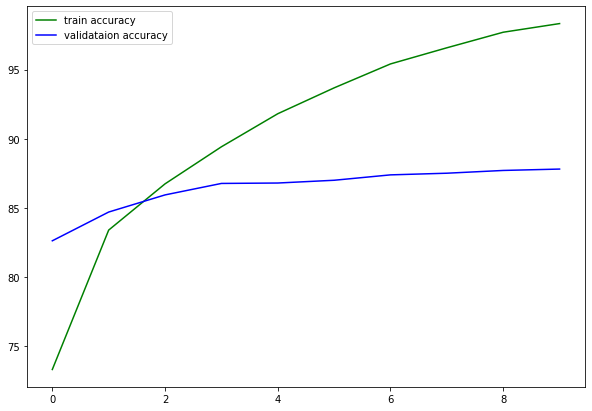

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validataion accuracy')
plt.legend()
plt.savefig('accuracy.png')
plt.show()

과적합이당~!

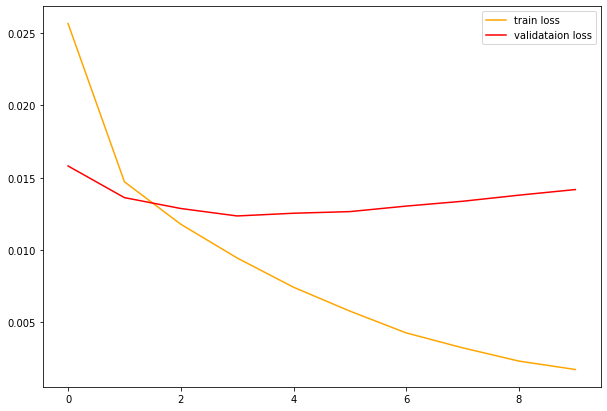

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.legend()
plt.savefig('loss.png')
plt.show()

